In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [60]:
df = pd.read_csv('/content/train (2).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [61]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [62]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='FireplaceQu'>

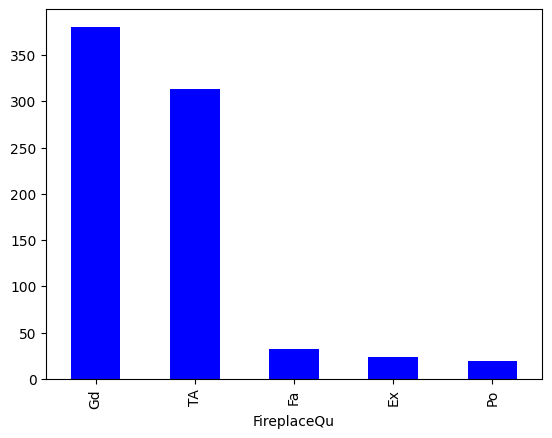

In [51]:
df['FireplaceQu'].value_counts().plot(kind='bar',color='blue')

<Axes: xlabel='GarageQual'>

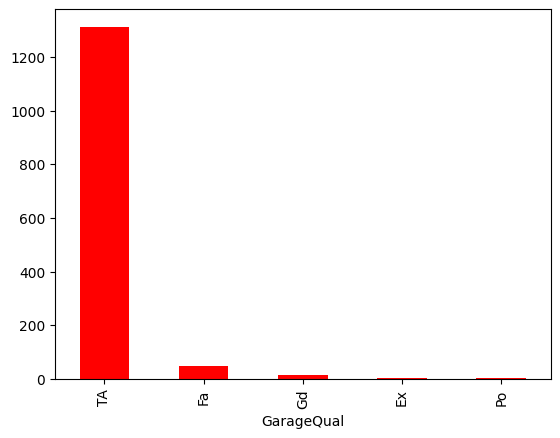

In [52]:
df['GarageQual'].value_counts().plot(kind='bar',color='red')

In [53]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


In [54]:
df['GarageQual'].mode()

,GarageQual
0,TA


In [55]:
df['FireplaceQu_Mode'] = df['FireplaceQu'].fillna('TA')

In [56]:
df['GarageQual_Mode'] = df['GarageQual'].fillna('Gd')

In [57]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000
FireplaceQu_Mode,0.000000
GarageQual_Mode,0.000000


In [58]:
df

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_Mode,GarageQual_Mode
0,NaN,TA,208500,TA,TA
1,TA,TA,181500,TA,TA
2,TA,TA,223500,TA,TA
3,Gd,TA,140000,Gd,TA
4,TA,TA,250000,TA,TA
...,...,...,...,...,...
1455,TA,TA,175000,TA,TA
1456,TA,TA,210000,TA,TA
1457,Gd,TA,266500,Gd,TA
1458,NaN,TA,142125,TA,TA


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [65]:
x_train.shape,x_test.shape

((1168, 2), (292, 2))

In [67]:
imputer = SimpleImputer(strategy='most_frequent')

In [68]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [70]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)